# Heart Disease Diagnosis in Cleveland

## Introduction

The Cleveland Heart Disease dataset contains data for 303 cardiac patients at the Cleveland Clinic. There are 13 attributes recorded for every patient that could be linked to the diagnosis of heart disease. We will use this data to predict the  diagnosis of a new patient based on medical information about them, to a high degree of accuracy. The prediction will determine the severity of a patient's heart disease, from 0 (no heart disease) to 4. 

This dataset contains common variables that lead to heart diseases and the associated diagnosis for 303 patients from Cleveland. It is expected that patient information held in this dataset can be used to accurately predict their diagnosis. The information on which we will base our analysis includes a patient’s age, resting blood pressure, cholesterol, and maximum heart rate achieved. 

### Expectations

We expect to find a positive relationship between the predictors and the severity of heart disease. With this, we could assess an individual’s health records and predict whether or not they will be afflicted with a heart condition and judge its severity. This model could be used clinically as a first step in assessing a patient for heart disease. It could indicate to physicians whether or not they should investigate further with more conclusive and accurate tests. These findings could lead to asking greater questions on applying this technique to anticipate other medical conditions. 

### Why these Predictors?

Ageing can cause changes in the heart and blood vessels. For example, as you age, it is natural that your heart will start pumping slowly, and as a result, you become prone to heart disease.

When blood pressure is high, damage is caused to organs and they must heal. This constant damage/healing cycle can promote atherosclerosis; a buildup of substances in the arteries that can impact blood flow and lead to heart problems.  

Cholesterol is a substance found in blood. Cholesterol is necessary to build cells, but high cholesterol can increase the risk of heart disease. It can cause fatty deposits in the blood vessels that can block blood flow or create clots. 

When the heart beats too fast, it may not pump enough blood to the rest of the body. This can starve organs and tissues of oxygen, cause tachycardia-related symptoms, and contribute to heart problems. 

### Methods

In this project, we will use classification to produce a model to predict heart disease diagnosis as accurately as possible. We will conduct our data analysis through the use of training and testing data, K nearest neighbor classification, and cross-validation to assess the function of our model. Once accuracy is determined, we will make a prediction for the diagnosison of new patient, whose medical information for all four predictors is known, but whose diagnosis is unknown. 

Below is the start of our wrangling and analysis of the dataset, as well as 6 graphs depicting how we will use the various predictors in our dataset to make a prediction of the diagnosis of a new patient. 

In [36]:
if (!require("pacman")) install.packages("pacman")
pacman::p_load(knitr, captioner, bundesligR, stringr)

Loading required package: pacman

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘pacman’”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


captioner installed

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


bundesligR installed



In [37]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
library(stringr)
library(GGally)
library(captioner)
options(repr.matrix.max.rows = 6)

In [70]:
table_nums <- captioner::captioner(prefix = "Table")

table_1_cap <- table_nums(name = "cleveland_heart_disease", 
                        caption = "Cleveland Heart Disease Dataset")

table_2_cap <- table_nums(name = "cleveland_heart_disease_yes_no", 
                        caption = "Heart Diseade Data with yes/no Classes for num")

table_3_cap <- table_nums("cleveland_select", "Heart Disease Data (Selected for Revelant Columns)")

table_4_cap <- table_nums("cleveland_training", "Heart Disease Training Data (random 75% of total data)")

table_5_cap <- table_nums("cleveland_summarized", "Proportion of num classes 'yes' and 'no'")

table_6_cap <- table_nums("cleveland_mean_predictors", "Mean of Each Predictor Value for Each num Class")

table_7_cap <- table_nums("new_patient", "New Patient Data with Unknown num Class")

table_8_cap <- table_nums("training_scaled", "Heart Disease Training Data, Scaled and Centered")

table_9_cap <- table_nums("cleveland_results", "Results from Cross-Validation of Heart Disease Training Data, Testing K Values from 1 to 35")

table_10_cap <- table_nums("cleveland_accuracy", "Accuracy Results from Predictions on Testing Data (25% of dataset) using the Model")

table_11_cap <- table_nums("cleveland_prediction", "Prediction of num Class for New Patient")


In [71]:
cleveland_heart_disease <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names=c("age", "sex", "cp", "trestbps", 
                                                                                                                                                    "chol", "fbs", "restecg", 
                                                                                                                                                    "thalach", "exang", "oldpeak", 
                                                                                                                                                    "slope", "ca", "thal", "num"))
table_1_cap
cleveland_heart_disease

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_character(),
  thal = col_character(),
  num = col_double()
)



[1] "Table  1: Cleveland Heart Disease Dataset"

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [72]:
cleveland_heart_disease$num <- str_replace(cleveland_heart_disease$num, "1", "yes")
cleveland_heart_disease$num <- str_replace(cleveland_heart_disease$num, "2", "yes")
cleveland_heart_disease$num <- str_replace(cleveland_heart_disease$num, "3", "yes")
cleveland_heart_disease$num <- str_replace(cleveland_heart_disease$num, "4", "yes")
cleveland_heart_disease$num <- str_replace(cleveland_heart_disease$num, "0", "no")

cleveland_heart_disease_yes_no <- cleveland_heart_disease

table_2_cap
cleveland_heart_disease_yes_no

[1] "Table  2: Heart Diseade Data with yes/no Classes for num"

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,no
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,yes
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,yes
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,yes
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,yes
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,no


## Descriptions for Relevant Columns:
* age: age in years
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* thalach: maximum heart rate achieved
* num: diagnosis of heart disease (yes = heart disease, no = no heart disease)

In [73]:
cleveland_select <- cleveland_heart_disease %>%
    select(-sex, -fbs, -slope, -ca, -oldpeak, -thal, -cp, -restecg, -exang)%>%
    mutate(num = as_factor(num))
table_3_cap
cleveland_select

[1] "Table  3: Heart Disease Data (Selected for Revelant Columns)"

age,trestbps,chol,thalach,num
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,145,233,150,no
67,160,286,108,yes
67,120,229,129,yes
⋮,⋮,⋮,⋮,⋮
57,130,131,115,yes
57,130,236,174,yes
38,138,175,173,no


In [74]:
set.seed(3546)

cleveland_split <- initial_split(cleveland_select, prop = 0.75, strata = num)
cleveland_training <- training(cleveland_split)
cleveland_testing <- testing(cleveland_split)

table_4_cap
cleveland_training

[1] "Table  4: Heart Disease Training Data (random 75% of total data)"

age,trestbps,chol,thalach,num
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,145,233,150,no
67,160,286,108,yes
56,120,236,178,no
⋮,⋮,⋮,⋮,⋮
68,144,193,141,yes
57,130,131,115,yes
38,138,175,173,no


## Training Data Information
The first table below shows the number patients that received each diagnosis.

The second shows the average value of each predictor.

The list displays the 5 column names in the training data.

In [75]:
cleveland_summarized <- cleveland_training %>%
group_by(num) %>%
dplyr::summarize(count = n())%>%
mutate(percentage = count/(sum(count))*100)

cleveland_mean_predictors <- cleveland_training %>%
group_by(num)%>%
summarize(mean_age = mean(age), mean_trestbps = mean(trestbps), mean_chol = mean(chol), mean_thalach = mean(thalach))

table_5_cap
cleveland_summarized
table_6_cap
cleveland_mean_predictors

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



[1] "Table  5: Proportion of num classes 'yes' and 'no'"

num,count,percentage
<fct>,<int>,<dbl>
no,123,53.94737
yes,105,46.05263


[1] "Table  6: Mean of Each Predictor Value for Each num Class"

num,mean_age,mean_trestbps,mean_chol,mean_thalach
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
no,52.57724,130.9756,241.3821,158.7561
yes,56.80952,136.1143,250.9238,137.6000


Note: The "no" and "yes" counts in the training data are very close, so upsampling is not necessary.

## New Patient Data

In [76]:
new_patient <- tibble(age = 52, trestbps = 160, chol = 193, thalach = 155)

table_7_cap
new_patient

[1] "Table  7: New Patient Data with Unknown num Class"

age,trestbps,chol,thalach
<dbl>,<dbl>,<dbl>,<dbl>
52,160,193,155


In [77]:
set.seed(3546)

cleveland_recipe <- recipe(num ~ ., data = cleveland_training)%>%
step_scale(all_predictors())%>%
step_center(all_predictors())

training_scaled <- prep(cleveland_recipe, retain = TRUE)%>%
bake(cleveland_training)

table_8_cap
training_scaled

[1] "Table  8: Heart Disease Training Data, Scaled and Centered"

age,trestbps,chol,thalach,num
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.9275061,0.6748684,-0.2564349,0.04185359,no
1.3653351,1.5432091,0.8073342,-1.73943518,yes
0.1613054,-0.7723663,-0.1962216,1.22937944,no
⋮,⋮,⋮,⋮,⋮
1.4747923,0.6169790,-1.059280,-0.3398511,yes
0.2707627,-0.1934724,-2.303689,-1.4425537,yes
-1.8089250,0.2696427,-1.420560,1.0173212,no


## Graphs Depicting Predictors and their Effect on Diagnosis

Warning message in warn_if_args_exist(list(...)):
“Extra arguments: 'alpha' are being ignored.  If these are meant to be aesthetics, submit them using the 'mapping' variable within ggpairs with ggplot2::aes or ggplot2::aes_string.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



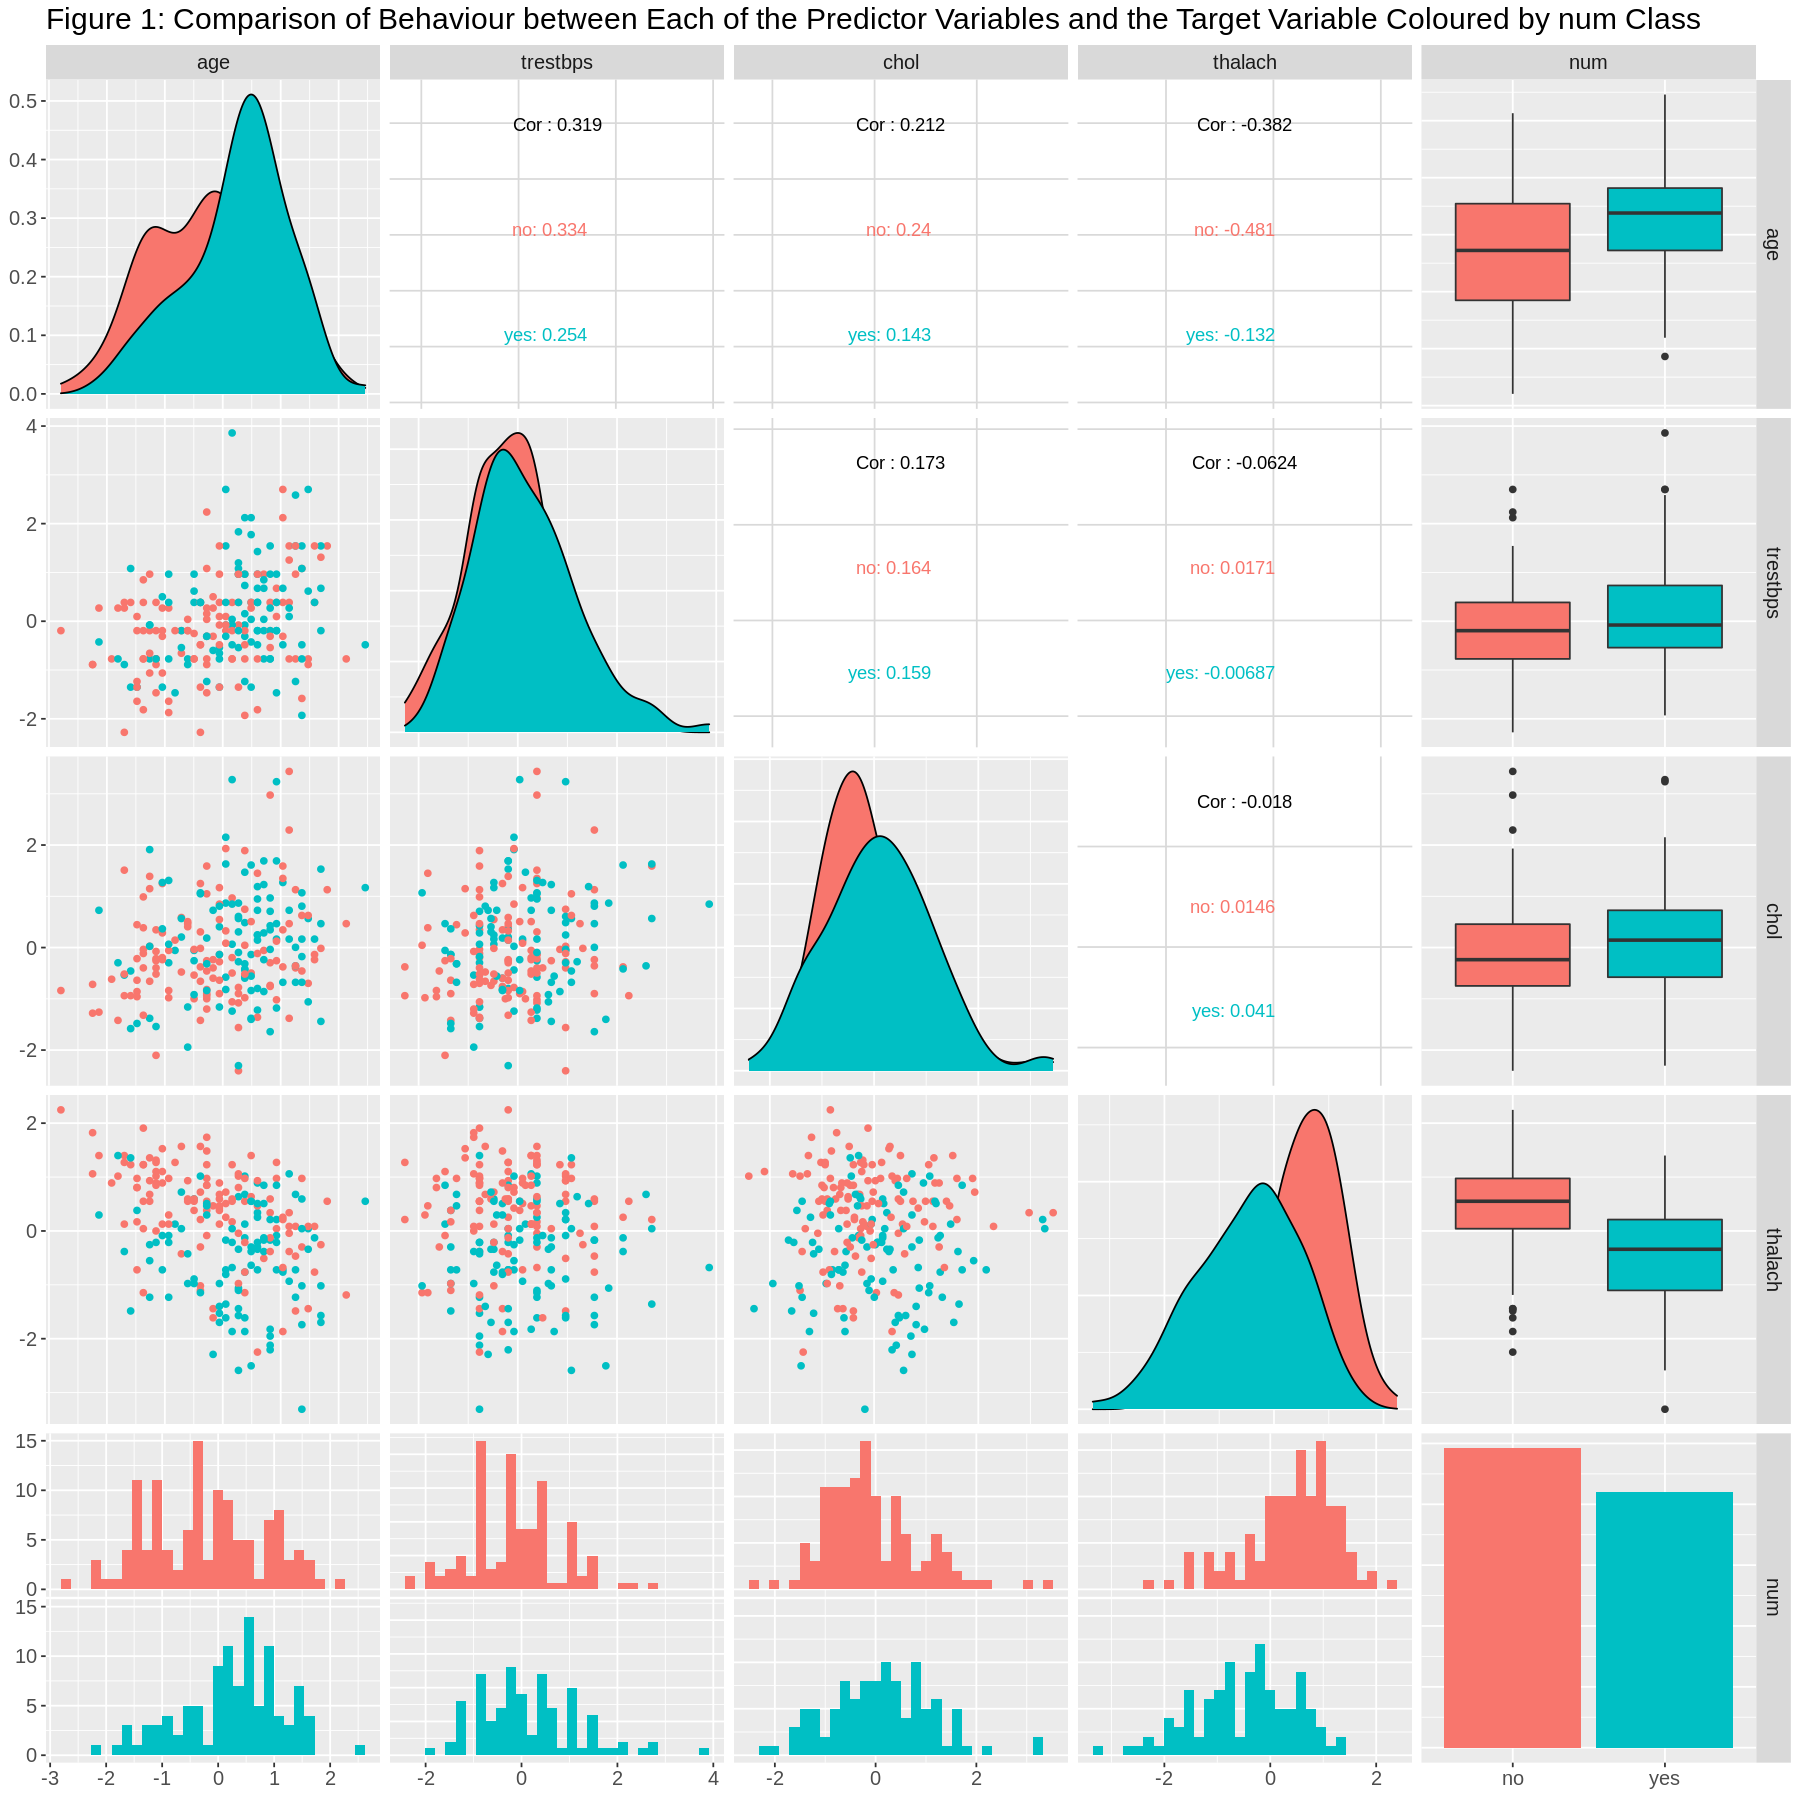

In [93]:
options(repr.plot.width = 15, repr.plot.height = 15)
cleveland_ggpairs <- ggpairs(training_scaled, aes(colour=num), alpha = 0.5)+
ggtitle("Figure 1: Comparison of Behaviour between Each of the Predictor Variables and the Target Variable Coloured by num Class")+
theme(text=element_text(size=15))
cleveland_ggpairs

In [79]:
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune())%>%
                set_engine("kknn")%>%
                set_mode("classification")
knn_tune

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [80]:
cleveland_vfold <- vfold_cv(cleveland_training, v = 5, strata = num)

In [81]:
set.seed(3546)

gridvals <- tibble(neighbors = seq(from=1, to=35))

cleveland_results <- workflow() %>% 
                    add_recipe(cleveland_recipe) %>% 
                    add_model(knn_tune) %>% 
                    tune_grid(resamples = cleveland_vfold, grid = gridvals) %>% 
                    collect_metrics() %>% 
                    filter(.metric == "accuracy")

table_9_cap
cleveland_results

[1] "Table  9: Results from Cross-Validation of Heart Disease Training Data, Testing K Values from 1 to 35"

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5568116,5,0.02690938,Model01
2,accuracy,binary,0.5568116,5,0.02690938,Model02
3,accuracy,binary,0.5960386,5,0.02539767,Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
33,accuracy,binary,0.6758454,5,0.03328955,Model33
34,accuracy,binary,0.6758454,5,0.03328955,Model34
35,accuracy,binary,0.6583575,5,0.03320299,Model35


## Visualization of Predicted Accuracy for Values of K from 1 to 35
This graph shows the behaviour of the mean accuracy as K changes. It also visually shows that 23 is the K value that yields the best accuracy. 

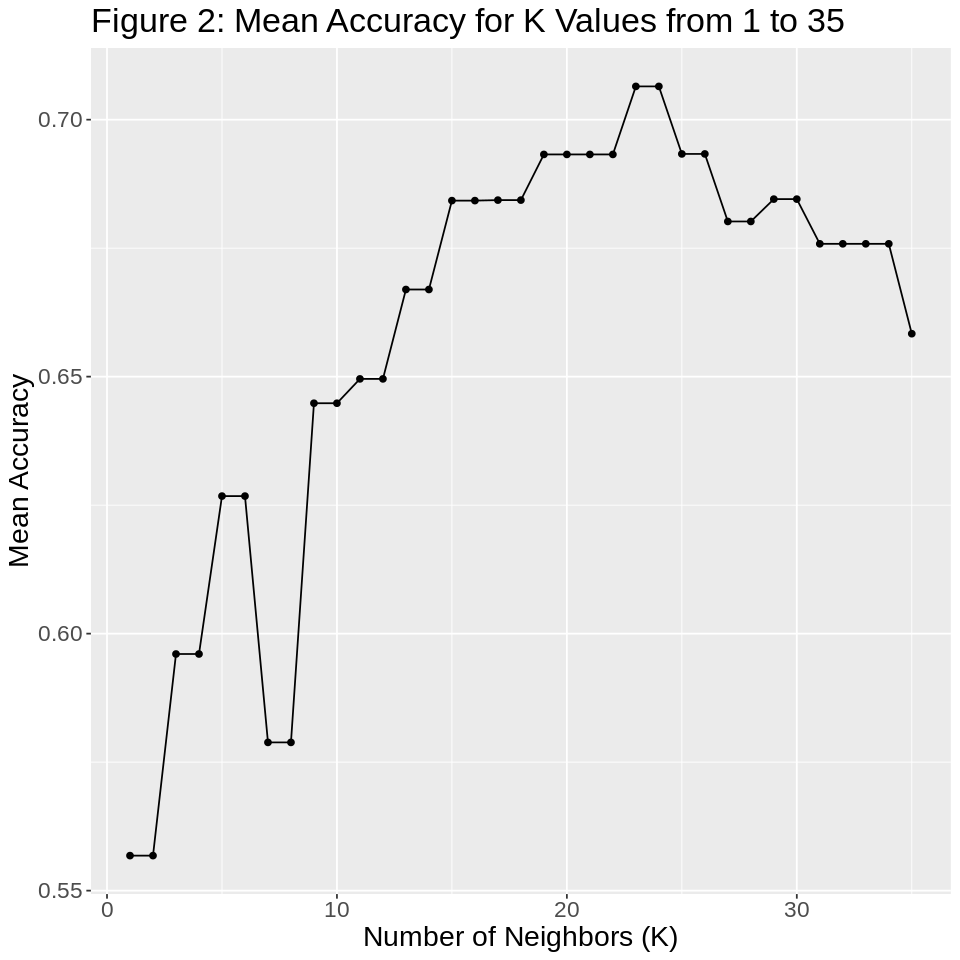

In [94]:
options(repr.plot.width = 8, repr.plot.height = 8)
k_val_plot <- cleveland_results %>%
ggplot(aes(x=neighbors, y=mean)) +
geom_point()+
geom_line()+
labs(x="Number of Neighbors (K)", y="Mean Accuracy")+
ggtitle("Figure 2: Mean Accuracy for K Values from 1 to 35")+
theme(text=element_text(size=17))
k_val_plot

In [83]:
best_k_val <- cleveland_results %>%
    arrange(desc(mean))%>%
    slice(1)%>%
    pull(neighbors)
best_k_val

[1] 23

In [84]:
mean_accuracy_best_k <- cleveland_results %>%
    filter(neighbors == "23")%>%
    pull(mean)*100
mean_accuracy_best_k

[1] 70.64734

70.647% accuracy is not a good accuracy score when considering the application of this model. This model predicts the diagnosis of potentially life threatening heart disease for new patients. It could be very dangerous for a patient to be misdiagnosed as having no heart disease.  

In [85]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k_val) %>%
    set_engine("kknn")%>%
    set_mode("classification")

cleveland_fit <- workflow()%>%
    add_recipe(cleveland_recipe)%>%
    add_model(knn_spec)%>%
    fit(cleveland_training)

cleveland_test <- cleveland_fit %>%
    predict(cleveland_testing) %>%
    bind_cols(cleveland_testing)%>%
    metrics(truth=num, estimate= .pred_class)

cleveland_accuracy <- cleveland_test %>%
    filter(.metric == "accuracy")

table_10_cap
cleveland_accuracy

[1] "Table  10: Accuracy Results from Predictions on Testing Data (25% of dataset) using the Model"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7333333


## Predicted Accuracy of Classification Model
This is the percentage of accuracy achieved when the training data is used to predict the num values for the testing data. This is a good representation of the accuracy of our model on new points. 

In [86]:
percent_accuracy <- cleveland_accuracy%>%
    pull(.estimate)*100
percent_accuracy

[1] 73.33333

## Graphs visualizing the new patient compared to the existing data

The following 6 graphs are the same as those we plotted earlier of the training data, except that these do not have scaled values and the new patient information is plotted into each graph. This helps us and readers visualize where among the population the new patient lies for each vector. This makes it much easier to understand and visualize than numbers in a table.

In [87]:
cleveland_training_new <- cleveland_training %>%
                        add_row(age = 52, trestbps = 160, chol = 193, thalach = 155) 

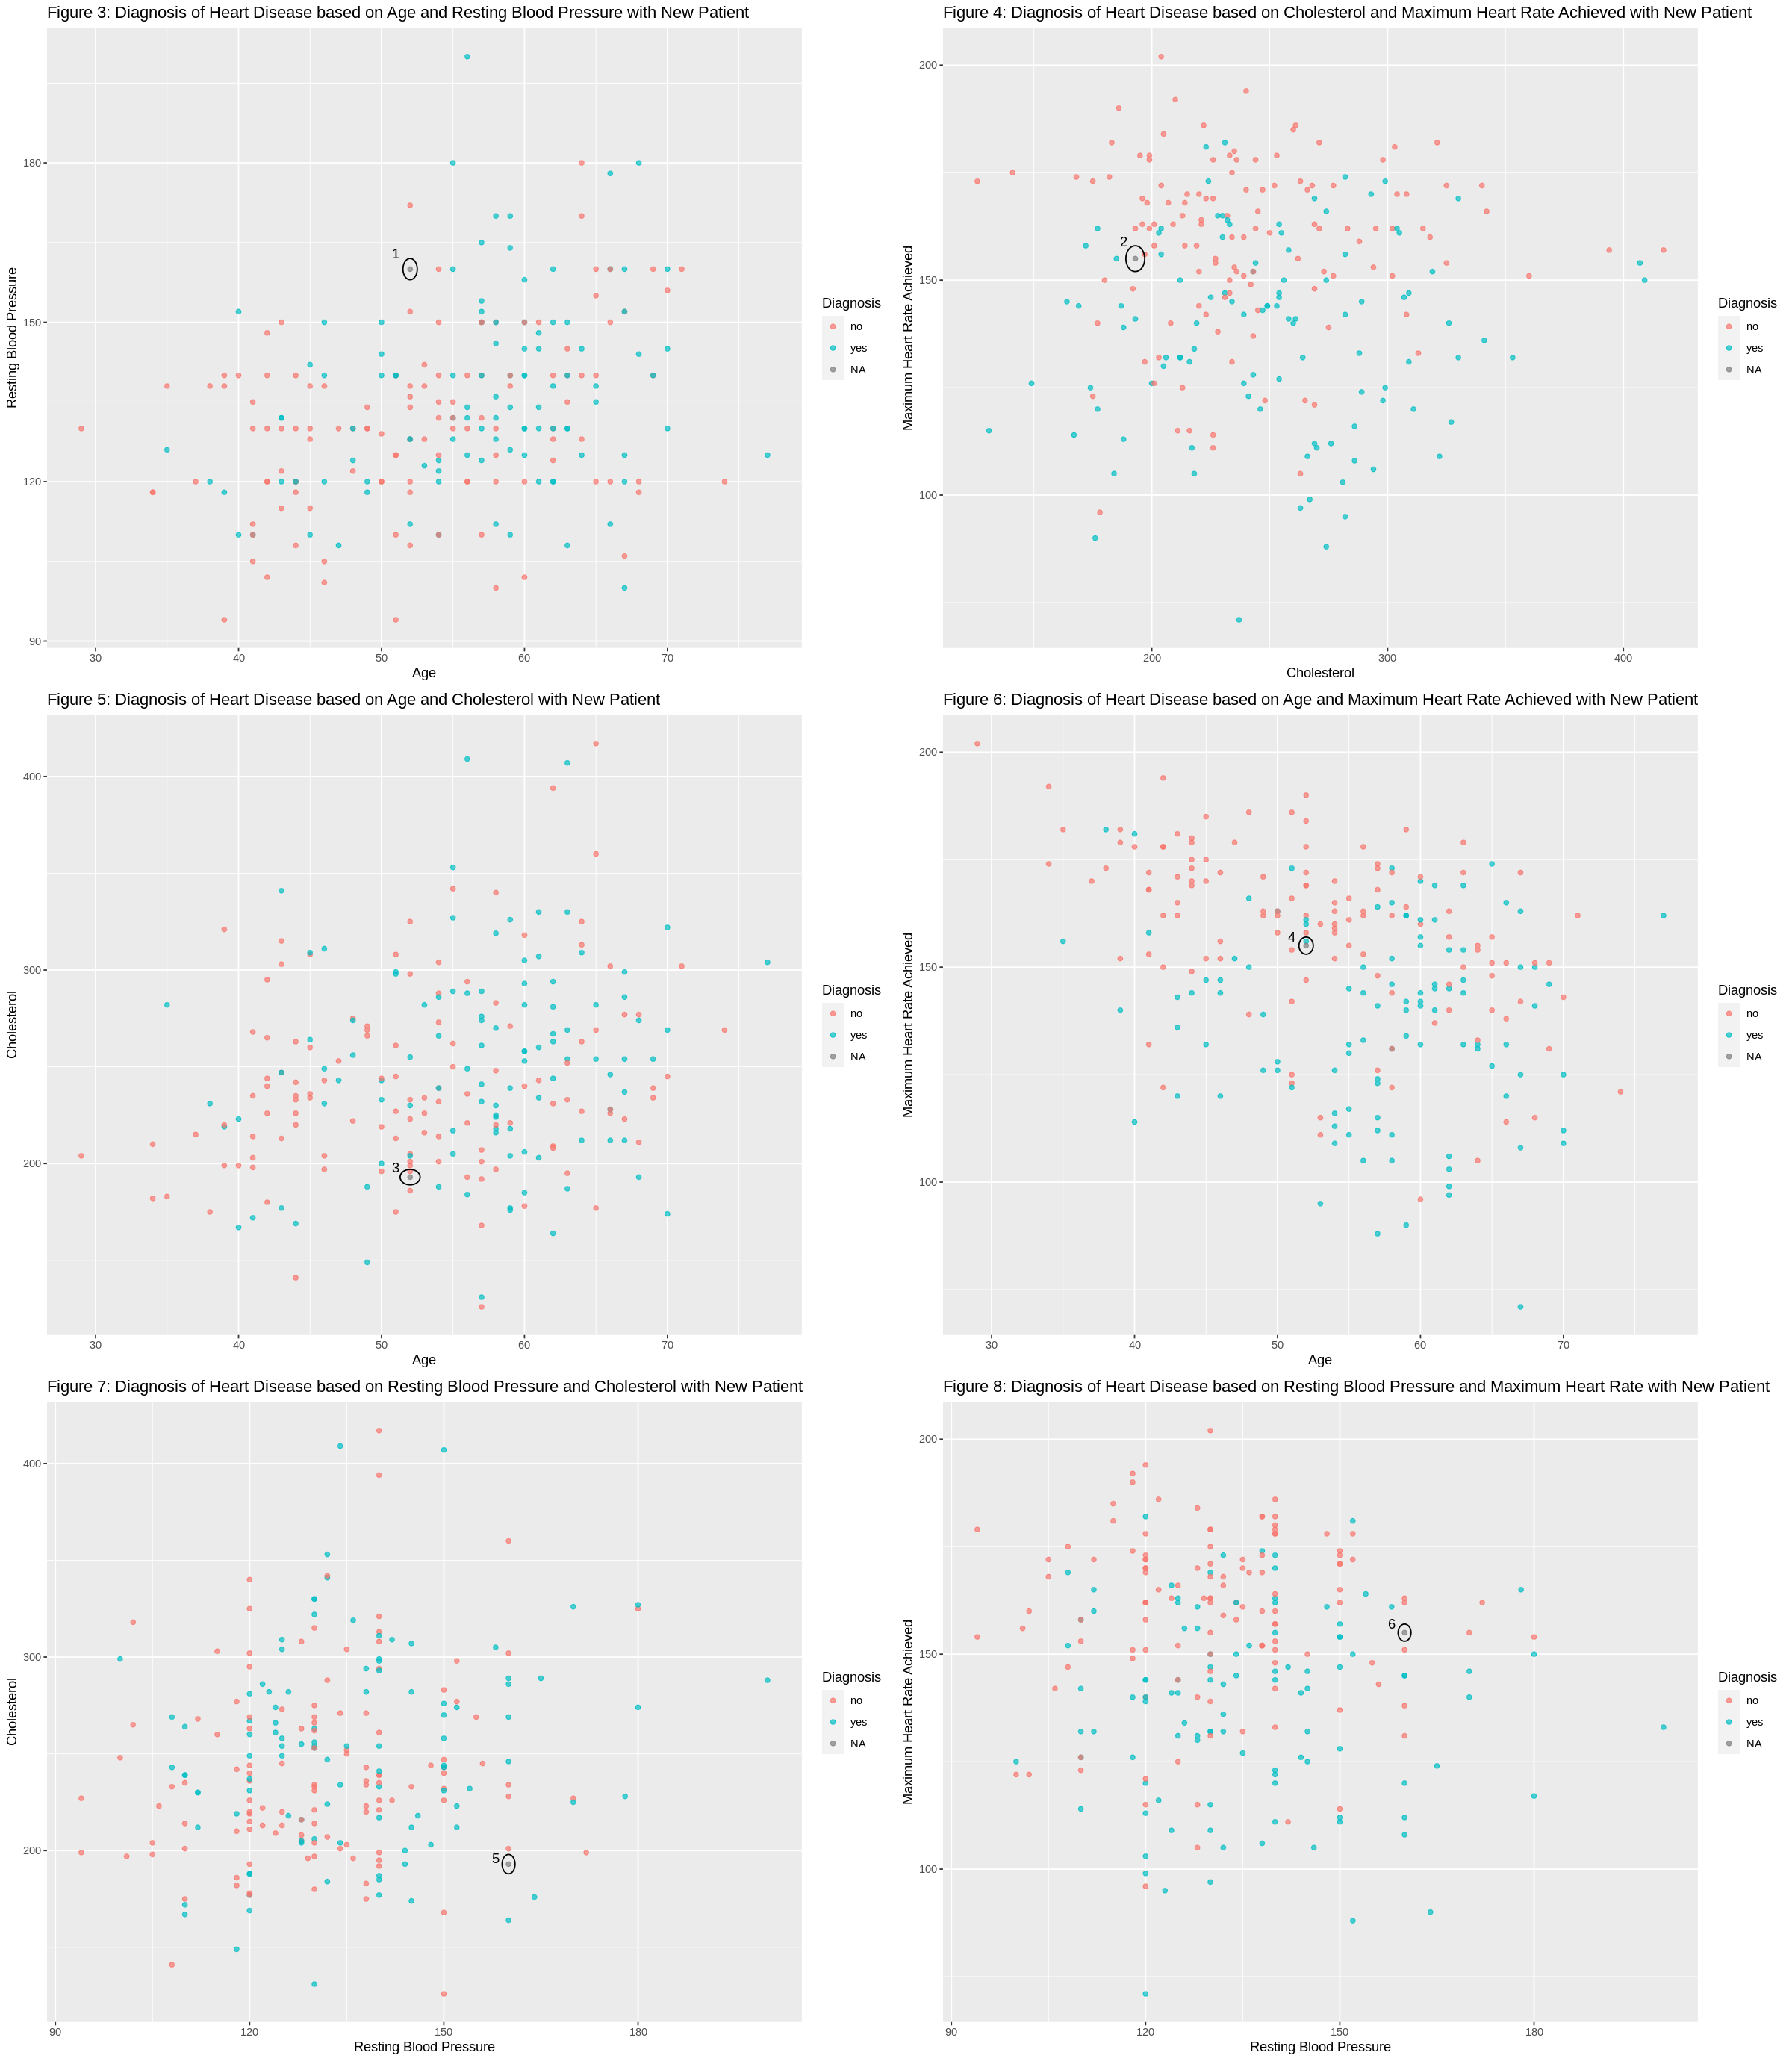

In [99]:
point1 <- c(52, 160)
point2 <- c(193, 155)
point3 <- c(52, 193)
point4 <- c(52, 155)
point5 <- c(160, 193)
point6 <- c(160, 155)

options(repr.plot.width = 20, repr.plot.height = 23)

cleveland_new_1 <- cleveland_training_new %>%
ggplot(aes(x=age, y=trestbps, colour=num)) +
geom_point(alpha = 0.7)+
labs(x="Age", y="Resting Blood Pressure", colour= "Diagnosis")+
ggtitle("Figure 3: Diagnosis of Heart Disease based on Age and Resting Blood Pressure with New Patient") +
annotate("path", 
                 x=point1[1] + 0.5*cos(seq(0,5*pi,length.out=100)),
                 y=point1[2] + 2*sin(seq(0,5*pi,length.out=100))) +
annotate("text", x = 51, y =  163, label = "1")

cleveland_new_2 <- cleveland_training_new %>%
ggplot(aes(x=chol, y=thalach, colour=num)) +
geom_point(alpha = 0.7)+
labs(x="Cholesterol", y="Maximum Heart Rate Achieved", colour= "Diagnosis")+
ggtitle("Figure 4: Diagnosis of Heart Disease based on Cholesterol and Maximum Heart Rate Achieved with New Patient") +
annotate("path", 
                 x=point2[1] + 4*cos(seq(0,5*pi,length.out=100)),
                 y=point2[2] + 3*sin(seq(0,5*pi,length.out=100))) +
annotate("text", x = 188, y =  159, label = "2")

cleveland_new_3 <- cleveland_training_new %>%
ggplot(aes(x=age, y=chol, colour=num)) +
geom_point(alpha = 0.7)+
labs(x="Age", y="Cholesterol", colour= "Diagnosis")+
ggtitle("Figure 5: Diagnosis of Heart Disease based on Age and Cholesterol with New Patient") +
annotate("path", 
                 x=point3[1] + 0.7*cos(seq(0,5*pi,length.out=100)),
                 y=point3[2] + 4*sin(seq(0,5*pi,length.out=100))) +
annotate("text", x = 51, y =  198, label = "3")

cleveland_new_4 <- cleveland_training_new %>%
ggplot(aes(x=age, y=thalach, colour=num)) +
geom_point(alpha = 0.7)+
labs(x="Age", y="Maximum Heart Rate Achieved", colour= "Diagnosis")+
ggtitle("Figure 6: Diagnosis of Heart Disease based on Age and Maximum Heart Rate Achieved with New Patient") +
annotate("path", 
                 x=point4[1] + 0.5*cos(seq(0,5*pi,length.out=100)),
                 y=point4[2] + 2*sin(seq(0,5*pi,length.out=100))) +
annotate("text", x = 51, y =  157, label = "4")

cleveland_new_5 <- cleveland_training_new %>%
ggplot(aes(x=trestbps, y=chol, colour=num)) +
geom_point(alpha = 0.7)+
labs(x="Resting Blood Pressure", y="Cholesterol", colour= "Diagnosis")+
ggtitle("Figure 7: Diagnosis of Heart Disease based on Resting Blood Pressure and Cholesterol with New Patient") +
annotate("path", 
                 x=point5[1] + 1*cos(seq(0,5*pi,length.out=100)),
                 y=point5[2] + 5*sin(seq(0,5*pi,length.out=100))) +
annotate("text", x = 158, y =  196, label = "5")


cleveland_new_6 <- cleveland_training_new %>%
ggplot(aes(x=trestbps, y=thalach, colour=num)) +
geom_point(alpha = 0.7)+
labs(x="Resting Blood Pressure", y="Maximum Heart Rate Achieved", colour= "Diagnosis")+
ggtitle("Figure 8: Diagnosis of Heart Disease based on Resting Blood Pressure and Maximum Heart Rate with New Patient") +
annotate("path", 
                 x=point6[1] + 1*cos(seq(0,5*pi,length.out=100)),
                 y=point6[2] + 2*sin(seq(0,5*pi,length.out=100))) +
annotate("text", x = 158, y =  157, label = "6")


plot_grid(cleveland_new_1, cleveland_new_2, cleveland_new_3, cleveland_new_4, cleveland_new_5, cleveland_new_6, ncol = 2)

## Using our model to make a prediction on a new patient (unknown diagnosis)

In [89]:
cleveland_prediction <- predict(cleveland_fit, new_patient) %>%
                        bind_cols(new_patient)

table_11_cap
cleveland_prediction

[1] "Table  11: Prediction of num Class for New Patient"

.pred_class,age,trestbps,chol,thalach
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
no,52,160,193,155


## Diagnosis of New Patient

In [90]:
diagnosis <- cleveland_prediction %>%
pull(.pred_class)
diagnosis

[1] no
Levels: no yes

Based on our model, we predict that this new patient is not suffering from heart disease. However, since our model is only 73.3% accurate, we would recommend additional testing to be sure.

## Citations
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Detrano, R., M.D., Ph.D. (n.d.). Heart Disease. Retrieved November 8, 2021, from https://archive.ics.uci.edu/ml/datasets/Heart+Disease

American Heart Association. (2021, February 23). Heart Disease and Stroke Statistics - 2021 Update. American Heart Association. https://www.ahajournals.org/doi/10.1161/CIR.0000000000000950 

Thomas, J. (2020, July 16). Heart Disease: Facts, Statistics, and You. Healthline. https://www.healthline.com/health/heart-disease/statistics#:~:text=As%20of%202018%2C%2030.3%20million,out%20of%20every%204%20deaths%20. 
